# How to Base Dominion Opening

Dominion is a game where a small advantage early on can snowball into a decisive advantage. As such, your opening buys (i.e., the cards you buy in the first two turns of the game) are very important in laying the foundation for your strategy throughout the rest of the game. Our goal is to rank openings of the second edition of the dominion base set from best to worst. It is worth noting that the best opening in a game of dominion is very kingdom dependent. This is one reason to focus our analysis on the base set since fewer cards means fewer kingdoms. That said, we should gain insight into the types of openings that generally work best.

If you are not familiar with dominion, learn to play for free at [Dominion Online](https://dominion.games/).

# The Data

The data for our analysis was manually collected from Burning Skull's phenomenal YouTube series: [How to Base Dominion](https://www.youtube.com/watch?v=JpPtxyGNGcg&list=PLtkTUMIr-WmKZCd4Q_KnrKtNJKR-vpC8a). Burning Skull is one of the best dominion players in the world. At the time of making his series, he was [one of the top 5 players](https://www.reddit.com/r/dominion/comments/6t3d2w/how_to_base_dominion/) on the leaderboard at [Dominion Online](https://dominion.games/). His series consists of him playing through 25 different games of the second edition of the dominion base set and explaining his decisions along the way.

Let's begin by taking a look at the file, 'data/openings.csv', which contains the openings made in the series. CSV stands for comma separated values. We can load this data as a DataFrame object using the Pandas Library in Python. 

In [1]:
import pandas as pd


openings = pd.read_csv('data/openings.csv')

In [2]:
openings

,game_id,hypothetical,player,opening_type,opening,kingdom
0,5553096,0,2,4-3,Militia-Silver,Moat-Harbinger-Vassal-Militia-Poacher-Throne R...
1,5558534,0,1,4-3,Chapel-Silver,Cellar-Chapel-Moat-Village-Gardens-Smithy-Thro...
2,5576934,0,2,3-4,Silver-Remodel,Moat-Harbinger-Merchant-Bureaucrat-Poacher-Rem...
3,5656537,0,1,4-3,Poacher-Chapel,Cellar-Chapel-Moat-Harbinger-Vassal-Poacher-Th...
4,5579553,0,2,3-4,Silver-Poacher,Cellar-Moat-Merchant-Vassal-Workshop-Poacher-F...
5,5657702,0,1,4-3,Remodel-Silver,Cellar-Harbinger-Gardens-Militia-Poacher-Remod...
6,5715500,0,2,2-5,Chapel-Laboratory,Chapel-Merchant-Workshop-Bureaucrat-Gardens-Mo...
7,5760302,0,2,4-3,Poacher-Chapel,Cellar-Chapel-Harbinger-Vassal-Workshop-Bureau...
8,5760557,0,1,3-4,Silver-Merchant,Cellar-Merchant-Gardens-Throne Room-Council Ro...
9,5788864,0,2,5-2,Witch-Chapel,Chapel-Moat-Vassal-Bandit-Council Room-Festiva...


Although there are only 25 games in Burning Skull's series, we have 31 openings since there are some instances in which he gave an indication of the opening he would have made if he had a different 'opening_type'. These instances are marked as 'hypothetical'.

To warm up let's rank the openings by popularity. For our purposes, the order of the opening buys does not matter.

In [3]:
import matplotlib.pyplot as plt


unordered_openings = openings.opening.apply(lambda x: tuple(sorted(x.split('-'))))
opening_counts = unordered_openings.value_counts()

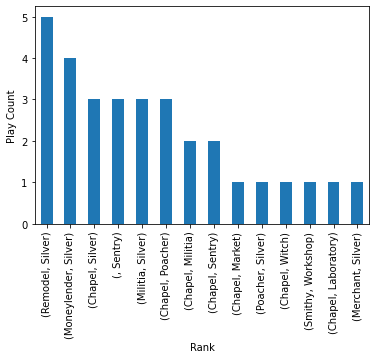

In [4]:
opening_counts.plot(kind='bar')
plt.xlabel('Rank')
plt.ylabel('Play Count')
plt.show()

Of course, this plot doesn't tell the whole story. For example, 4-3 openings are 5 times more likely than 5-2 openings to occur in a random dominion game. So let's normalize these openings by the number of times they could have occured.

In [5]:
def get_possible_openings(kingdom, opening_type):
    kingdom = kingdom.split('-')
    kingdom += ['Curse', 'Copper', 'Estate', 'Silver', 'Duchy', 'Gold', 'Province']
    cards = pd.read_csv('data/base_cards.csv')
    cards = cards[cards.card.isin(kingdom)]
    first, second = list(map(int, opening_type.split('-')))
    first = cards[cards.cost <= first].card.tolist() + ['']
    second = cards[cards.cost <= second].card.tolist() + ['']
    return set([tuple(sorted([f, s])) for f in first for s in second])

In [6]:
possible_opening_counts = {}
for i, row in openings.iterrows():
    possible_openings = get_possible_openings(row['kingdom'], row['opening_type'])
    for opening in possible_openings:
        possible_opening_counts[opening] = possible_opening_counts.get(opening, 0) + 1

In [7]:
normalized_opening_counts = pd.Series({k: v/possible_opening_counts[k] for k, v in opening_counts.iteritems()})
normalized_opening_counts.sort_values(inplace=True, ascending=False)

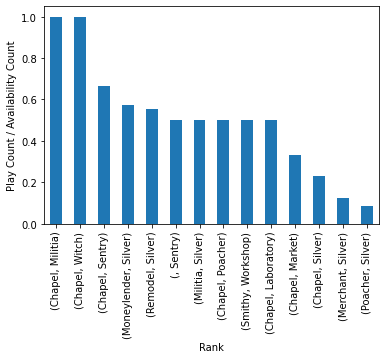

In [8]:
normalized_opening_counts.plot(kind='bar')
plt.xlabel('Rank')
plt.ylabel('Play Count / Availability Count')
plt.show()

So (Chapel, Militia) and (Chapel, Witch) were played 100% of the time that they were available to play! So they must be great openings, right? From our previous plot, we know that they were available to play only twice and once, respectively, so we can't be that certain of these rankings either. We're going to need a more sophisticated approach.

## The Plan

We will consider each opening as a player in the game of "Which opening does Burning Skull prefer?". From each dominion game, we can extract a list of matches where the better player is the picked opening and the worse player is an opening that wasn't picked. Then we can use a rating system to rank the openings given the match outcomes.

We have many options for ratings systems. One of the most popular is the [Elo rating system](https://en.wikipedia.org/wiki/Elo_rating_system), which was developed by Arpad Elo as a chess-rating system in the 1950s. The Elo system is simple and effective, but with modern computation better rating systems have been developed. The Glicko and Glicko-2 systems developed by [Mark Glickman](http://www.glicko.net/glicko.html) improve over the Elo system. The Glicko system introduces a rating deviation (RD), which captures the uncertainty in a player's rating, and the Glicko-2 system introduces a rating volatility which indicates a degree of expected fluctuation in a player's rating. The Glicko-2 system in particular is [used by Dominion Online](http://forum.shuffleit.nl/index.php?topic=1679.msg5891#msg5891). Finally, there is the [TrueSkill rating system](https://proceedings.neurips.cc/paper/2006/file/f44ee263952e65b3610b8ba51229d1f9-Paper.pdf) developed by Microsoft for XBox Live, which uses sophisticated statistical machinery in the form of approximate message passing on a factor graph representation and can be used on games with more than 2 players.

Lucky for us, implementations of all these systems are available in Python. We will use the TrueSkill system as implemented by the [TrueSkill library](https://trueskill.org/) as it has been shown to [better predict match outcomes in practice](https://www.kaggle.com/c/chess/discussion/186), and it converges on skills relatively quickly which is important given our limited data.

## The Matches

Let's extract the matches from each set of games.

In [9]:
matches = {'game_id':[] , 'better': [], 'worse': [], 'drawn': []}
for i, row in openings.iterrows():
    better = tuple(sorted(row['opening'].split('-')))
    possible_openings = get_possible_openings(row['kingdom'], row['opening_type'])
    for worse in opening_counts.index:
        if worse in possible_openings and worse != better:
            matches['game_id'].append(row['game_id'])
            matches['better'].append(better)
            matches['worse'].append(worse)
            matches['drawn'].append(False)
matches = pd.DataFrame(matches)

In [10]:
matches

,game_id,better,worse,drawn
0,5553096,"(Militia, Silver)","(Poacher, Silver)",False
1,5576934,"(Remodel, Silver)","(Poacher, Silver)",False
2,5576934,"(Remodel, Silver)","(Merchant, Silver)",False
3,5656537,"(Chapel, Poacher)","(Chapel, Silver)",False
4,5656537,"(Chapel, Poacher)","(Poacher, Silver)",False
5,5579553,"(Poacher, Silver)","(Merchant, Silver)",False
6,5657702,"(Remodel, Silver)","(Militia, Silver)",False
7,5657702,"(Remodel, Silver)","(Poacher, Silver)",False
8,5715500,"(Chapel, Laboratory)","(Chapel, Silver)",False
9,5715500,"(Chapel, Laboratory)","(, Sentry)",False


## The Ratings

Great! We were able to extract 49 matches from our 31 games. Now we need some code to compute the ratings and plot the results. Updating the ratings is easy using trueskill.rate_1vs1 for each match. After we compute the ratings, we can plot mu (the skill) and sigma (the uncertainty) for each opening. Instead of ranking the openings by skill though, we will rank them by mu - 3\*sigma, which is a more conservative estimate of skill that takes into account the uncertainty. This is similar to what is done for the [Dominion Online leaderboard](http://forum.shuffleit.nl/index.php?topic=1679.msg5891#msg5891).

In [11]:
import trueskill


def update_ratings(ratings, matches):
    for i, row in matches.iterrows():
        b, w, d = row['better'], row['worse'], row['drawn']
        ratings[b], ratings[w] = trueskill.rate_1vs1(ratings[b], ratings[w], d)

def plot_ratings(ratings):
    ratings = ratings.to_frame('rating')
    ratings['mu'] = ratings.rating.apply(lambda x: x.mu)
    ratings['sigma'] = ratings.rating.apply(lambda x: x.sigma)
    ratings['rank'] = ratings.mu - 3*ratings.sigma
    ratings.sort_values('rank', inplace=True, ascending=False)
    ratings.plot(kind='bar', y='mu', yerr='sigma', legend=False)
    plt.xlabel('Rank')
    plt.ylabel('Mu (Sigma)')

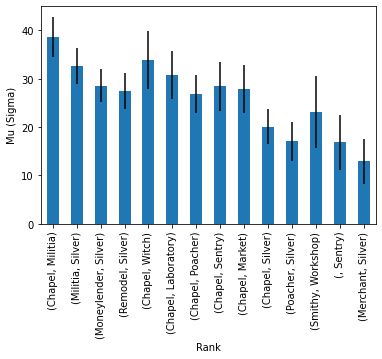

In [12]:
ratings = pd.Series({opening: trueskill.Rating() for opening in opening_counts.index})
update_ratings(ratings, matches)
plot_ratings(ratings)

All right, so there is a lot of uncertainty in our rankings, which makes sense because of our limited data. However, these rankings are also highly dependent on the order in which we do our updates. Observe what happens if we randomly shuffle the matches.

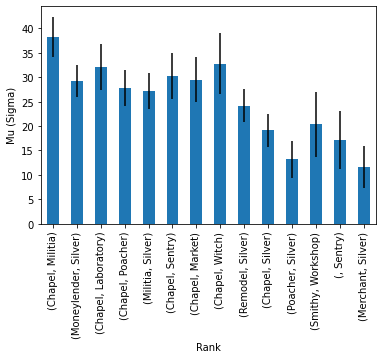

In [13]:
ratings = pd.Series({opening: trueskill.Rating() for opening in opening_counts.index})
shuffled_matches = matches.sample(frac=1)
update_ratings(ratings, shuffled_matches)
plot_ratings(ratings)

This happens because the first couple updates are relatively uninformed. For example, if you beat a strong player before the rating system knows that player is strong, then the rating system may underestimate your skill. We can solve this problem by updating the ratings with the same set of matches several times until the rankings stabilize. This will give us a more accurate estimate of skill, but this solution isn't perfect. It will artificially reduce our estimate of the uncertainty. This is somewhat compensated by the fact that Burning Skull picking one opening over another is a strong indication of that opening being better. That said, we can certainly get more accurate estimates of uncertainty through a method known as the [empirical bootstrap](https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading24.pdf), which involves repeating our procedure several times with random samples of our dataset. However, it is more computationally expensive, so let's get to that later.

In [14]:
def get_ratings(matches):
    ratings = pd.Series({opening: trueskill.Rating() for opening in opening_counts.index})
    for i in range(100):
        update_ratings(ratings, matches)
    return ratings

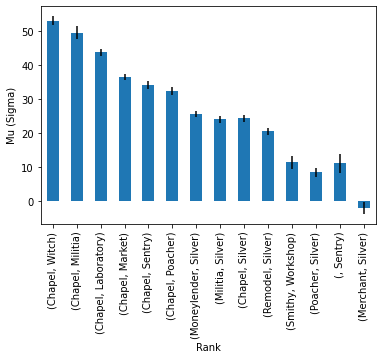

In [15]:
ratings = get_ratings(matches)
plot_ratings(ratings)

These rankings are starting to look quite reasonable! A strong trasher, Chapel, as well as attacks, like Witch and Militia, are prioritized. Openings with Silver are less effective which is reasonable since Silver is available in every kingdom, and thus serves as a good default option, but not necessarily the best option.

That said, one opening in particular seems out of place: (, Sentry). Burning Skull frequently commented on 5-2 type openings being good when Sentry is around. While Chapel is more effective at trashing, Sentry is a strong trasher, and it remains a good card in the late game because it can also discard bad cards before they are drawn.

Our current approach is good at comparing openings of the same opening type, since it compares the actual opening against the openings that could have been made with that opening type, but it is less effective at comparing openings with different opening types. On a given board, is it better to have a 5-2 opening or a 4-3 opening?

Lucky for us, Burning Skull occasionally sheds light on this question in his explanations. The file 'data/opening_comparisons.csv' contains comparisons between openings with different opening types, as well as some openings that he says are similar in strength (which are marked as 'drawn'), extracted from specific games in his videos.

In [16]:
additional_matches = pd.read_csv('data/opening_comparisons.csv')
additional_matches.better = additional_matches.better.apply(lambda x: tuple(sorted(x.split('-'))))
additional_matches.worse = additional_matches.worse.apply(lambda x: tuple(sorted(x.split('-'))))

In [17]:
additional_matches

,game_id,better,worse,drawn
0,5553096,"(, Sentry)","(Militia, Silver)",0
1,5558534,"(Chapel, Sentry)","(Chapel, Silver)",0
2,5656537,"(Chapel, Market)","(Chapel, Poacher)",0
3,5579553,"(, Sentry)","(Poacher, Silver)",0
4,5788864,"(Chapel, Laboratory)","(Chapel, Witch)",1
5,5844082,"(, Sentry)","(Moneylender, Silver)",0
6,5924162,"(Chapel, Silver)","(Remodel, Silver)",0
7,5982614,"(, Sentry)","(Moneylender, Silver)",0
8,6033410,"(, Sentry)","(Militia, Silver)",0
9,6033410,"(, Sentry)","(Poacher, Silver)",0


We have 16 additional matches, which brings our total to 65. Let's see how they affect the rankings.

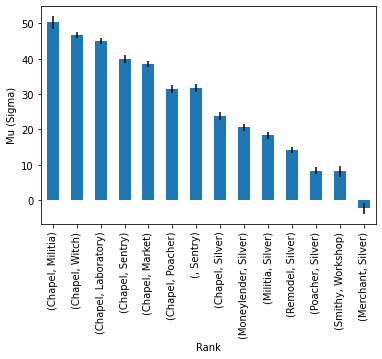

In [18]:
total_matches = pd.concat([matches, additional_matches])
ratings = get_ratings(total_matches)
plot_ratings(ratings)

Looks good! As a final sanity check, let's compare these rankings to those available at [Council Room](http://councilroom.com/openings). It's a bit outdated, so it doesn't have all the openings from the second edition of the base set. Also, how base dominion openings compare in the context of base set is different than how base dominion openings compare in the context of the expansions. That said, it should be helpful, so let's take a look.

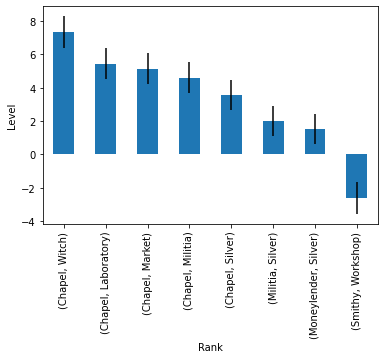

In [19]:
ranks = pd.read_html('http://councilroom.com/openings')[0]
ranks.cards = ranks.cards.apply(lambda x: tuple(sorted(x.split(' / '))))
ranks[['skill', 'uncertainty']] = ranks['skill range'].str.split(' ± ', expand=True).astype(float)
ranks = ranks[ranks.cards.isin(opening_counts.index)]
ranks.plot(kind='bar', x='cards', y='skill', yerr='uncertainty', legend=False)
plt.xlabel('Rank')
plt.ylabel('Level')
plt.show()

Pretty consistent with our results! The only opening with a much different rank is (Chapel, Militia). Is it a better opening in the context of the base set or does Burning Skull just love Militia? Who's to say? We would need more data to answer that question.


## The Finale

We've made it this far. Only one loose end left to tie up: the uncertainties. Our skill estimates will remain unchanged — we're just calculating the uncertainties — but it could change the rankings a little.

In [20]:
def get_bootstrapped_ratings(matches):
    ratings = get_ratings(matches).apply(lambda x: x.mu).to_frame('mu')
    for i in range(100):
        ratings[i] = get_ratings(matches.sample(frac=1, replace=True)).apply(lambda x: x.mu)
    ratings['sigma'] = ratings[list(range(100))].std(axis=1)
    return ratings.apply(lambda x: trueskill.Rating(x.mu, x.sigma), axis=1)

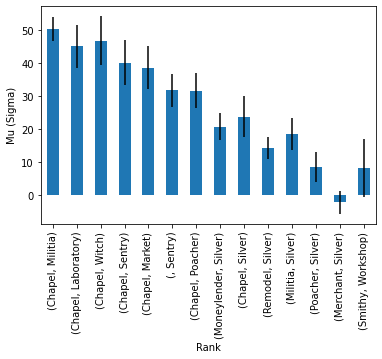

In [21]:
ratings = get_bootstrapped_ratings(total_matches)
plot_ratings(ratings)

And there we have it. The best base dominion openings ;) Enjoy!